# I. Dados disponíveis
Os arquivos estão disponíveis no Portal Dados Abertos, no conjunto de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS), acessado em https://dados.gov.br/dados/organizacoes/visualizar/ministerio-do-desenvolvimento-e-assistencia-social-familia-e-combate-a-fome.
No Portal Dados Abertos estão disponibilizados arquivos de 2006 a 2023. Ao analisarmos os dados, verificamos que os dados de faixa de renda constam a partir de abril 2012. Desta forma, a análise de mobilidade de renda será feita entre  2012 e 2023, comparando sempre os meses de agosto. 

## 1. Dicionário do conjunto de dados

### Variáveis
- ibge: código ibge do município
- anomes: Ano/mês de referência do dado
- cadunico_tot_fam: total de famílias cadastradas
- cadunico_tot_pes: total de pessoas cadastradas
- cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo
- cadunico_tot_pes_rpc_ate_meio_sm:: total de pessoas com renda per capita até meio salário mínimo
- cadunico_tot_fam_pob: total de famílias em situação de pobreza
- cadunico_tot_pes_pob: total de pessoas em situação de pobreza
- cadunico_tot_fam_ext_pob: total de famílias em situação de extrema pobreza
- cadunico_tot_pes_ext_pob: total de pessoas em situação de extrema pobreza
- cadunico_tot_fam_pob_e_ext_pob: total de famílias em situação de pobreza e de extrema pobreza
- cadunico_tot_pes_pob_e_ext_pob: total de pessoas em situação de pobreza e de extrema pobreza

### Definições de extrema pobreza e pobreza
As definifições de extrema pobreza e pobreza são atualizadas ao longo dos anos, conforme o Art. 18 do Decreto nº 5.209 de 17/09/2004.

#### Extrema pobreza 
-  Até abril de 2014: renda per capita menor igual a 70 reais
- De maio de 2014 a junho de 2016: renda per capita menor igual a 77 reais
- De julho de 2016 a maio de 2018: renda per capita menor igual a 85 reais
- De junho de 2018 em diante: renda per capita menor igual a 89 reais

#### Pobreza
- Até abril de 2014: renda per capita de 70,01 reais a 140 reais
- De maio de 2014 a junho de 2016: renda per capita de 77,01 reais a 154 reais
- De julho de 2016 a maio de 2018: renda per capita de 85,01 reais a 170 reais
- De junho de 2018 em diante: renda per capita de 89,01 reais a 178 reais



In [103]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# II. Coleta e Preparo dos dados

## 1. Acesso

In [15]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2021 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2021*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2020 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2020*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2019 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2019*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2018 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2018*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2017 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2017*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2016 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2016*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2015 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2015*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2014 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2014*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2013 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2013*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2012 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2012*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

In [16]:
df_cad_2023 = pd.read_csv(url_cad_2023, sep = ",")
df_cad_2022 = pd.read_csv(url_cad_2022, sep = ",")
df_cad_2021 = pd.read_csv(url_cad_2021, sep = ",")
df_cad_2020 = pd.read_csv(url_cad_2020, sep = ",")
df_cad_2019 = pd.read_csv(url_cad_2019, sep = ",")
df_cad_2018 = pd.read_csv(url_cad_2018, sep = ",")
df_cad_2017 = pd.read_csv(url_cad_2017, sep = ",")
df_cad_2016 = pd.read_csv(url_cad_2016, sep = ",")
df_cad_2015 = pd.read_csv(url_cad_2015, sep = ",")
df_cad_2014 = pd.read_csv(url_cad_2014, sep = ",")
df_cad_2013 = pd.read_csv(url_cad_2013, sep = ",")
df_cad_2012 = pd.read_csv(url_cad_2012, sep = ",")

In [12]:
df_cad_2012.head()

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0


In [21]:
# Retirar dados de janeiro a março de 2012
df_cad_2012.replace(0.0, np.nan, inplace=True)
df_cad_2012_limpo = df_cad_2012.dropna(how='any')
df_cad_2012_limpo['anomes'].unique()

array([201212, 201211, 201210, 201209, 201208, 201207, 201206, 201205,
       201204], dtype=int64)

In [24]:
#Dados 2011
df_cad_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55646 entries, 0 to 55645
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55646 non-null  int64  
 1   anomes                            55646 non-null  int64  
 2   cadunico_tot_fam                  55646 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [25]:
#Dados 2010
df_cad_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55644 entries, 0 to 55643
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55644 non-null  int64  
 1   anomes                            55644 non-null  int64  
 2   cadunico_tot_fam                  55644 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [26]:
#Dados de 2009
df_cad_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55640 entries, 0 to 55639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55640 non-null  int64  
 1   anomes                            55640 non-null  int64  
 2   cadunico_tot_fam                  55640 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [27]:
#Dados de 2008
df_cad_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204 entries, 0 to 61203
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61204 non-null  int64  
 1   anomes                            61204 non-null  int64  
 2   cadunico_tot_fam                  61204 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [28]:
# Dados de 2007
df_cad_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              66761 non-null  int64  
 1   anomes                            66761 non-null  int64  
 2   cadunico_tot_fam                  66761 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [29]:
# Dados de 2006
df_cad_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              11123 non-null  int64  
 1   anomes                            11123 non-null  int64  
 2   cadunico_tot_fam                  11123 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

## 2. Concatenação e edição

In [66]:
df_cad_2012_2023 = pd.concat([df_cad_2012_limpo, df_cad_2013, df_cad_2014, df_cad_2015, df_cad_2016, df_cad_2017, df_cad_2018, df_cad_2019, df_cad_2020, df_cad_2021, df_cad_2022, df_cad_2023])

In [67]:
df_cad_2012_2023.rename(columns={'ibge': 'ibge_6', 'anomes': 'ano','cadunico_tot_fam': 'total_fam', 'cadunico_tot_pes': 'total_pes', 'cadunico_tot_fam_rpc_ate_meio_sm': 'total_fam_ate_meio_sm',
                                          'cadunico_tot_pes_rpc_ate_meio_sm': 'total_pes_ate_meio_sm', 'cadunico_tot_fam_pob': 'total_fam_pob', 
                                          'cadunico_tot_pes_pob': 'total_pes_pob', 'cadunico_tot_fam_ext_pob': 'total_fam_ext_pob' , 
                                          'cadunico_tot_pes_ext_pob': 'total_pes_ext_pob', 'cadunico_tot_fam_pob_e_ext_pob': 'total_fam_pob_e_ext_pob',
                                          'cadunico_tot_pes_pob_e_ext_pob': 'total_pes_pob_e_ext_pob' }, inplace=True)

In [68]:
df_cad_2012_2023_fx_renda = df_cad_2012_2023[['total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob']].groupby([df_cad_2012_2023['ibge_6'],df_cad_2012_2023['ano']]).sum() 

In [69]:
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 ano                                                   
110001 201204       3962    13696.0                 3446.0   
       201205       3962    13696.0                 3446.0   
       201206       4019    13461.0                 3504.0   
       201207       4078    14010.0                 3557.0   
       201208       4108    14071.0                 3561.0   

               total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 ano                                                           
110001 201204                12854.0         1103.0         4177.0   
       201205                12854.0         1103.0         4177.0   
       201206                12634.0         1118.0         4121.0   
       201207                13156.0         1130.0         4274.0   
       201208                13164.0         1125.0         4258.0   

               total_fam_ext_pob  total_pes_ext_pob  total_fam_pob_e_ext_pob  \
ibge_6 ano                                                                     
110001 201204             1919.0             7324.0                   3022.0   
       201205             1919.0             7324.0                   3022.0   
       201206             1957.0             7182.0                   3075.0   
       201207             1980.0             7470.0                   3110.0   
       201208             1967.0             7420.0                   3092.0   

               total_pes_pob_e_ext_pob  
ibge_6 ano                              
110001 201204                  11501.0  
       201205                  11501.0  
       201206                  11303.0  
       201207                  11744.0  
       201208                  11678.0

In [37]:
df_cad_2012_2023_fx_renda['total_fam_bx_renda'] = df_cad_2012_2023_fx_renda['total_fam_ate_meio_sm']-df_cad_2012_2023_fx_renda['total_fam_pob_e_ext_pob']
df_cad_2012_2023_fx_renda.head()

total_fam  total_pes  total_fam_ate_meio_sm  \
ibge_6 referencia                                                
110001 201204           3962    13696.0                 3446.0   
       201205           3962    13696.0                 3446.0   
       201206           4019    13461.0                 3504.0   
       201207           4078    14010.0                 3557.0   
       201208           4108    14071.0                 3561.0   

                   total_pes_ate_meio_sm  total_fam_pob  total_pes_pob  \
ibge_6 referencia                                                        
110001 201204                    12854.0         1103.0         4177.0   
       201205                    12854.0         1103.0         4177.0   
       201206                    12634.0         1118.0         4121.0   
       201207                    13156.0         1130.0         4274.0   
       201208                    13164.0         1125.0         4258.0   

                   total_fam_ext_pob  total_pes_ext_pob  \
ibge_6 referencia                                         
110001 201204                 1919.0             7324.0   
       201205                 1919.0             7324.0   
       201206                 1957.0             7182.0   
       201207                 1980.0             7470.0   
       201208                 1967.0             7420.0   

                   total_fam_pob_e_ext_pob  total_pes_pob_e_ext_pob  \
ibge_6 referencia                                                     
110001 201204                       3022.0                  11501.0   
       201205                       3022.0                  11501.0   
       201206                       3075.0                  11303.0   
       201207                       3110.0                  11744.0   
       201208                       3092.0                  11678.0   

                   total_fam_bx_renda  
ibge_6 referencia                      
110001 201204                   424.0  
       201205                   424.0  
       201206                   429.0  
       201207                   447.0  
       201208                   469.0

## 3. Criar Data Frame para a análise gráfica anual

In [70]:
# Incluir total de famílias baixa renda
df_cad_2012_2023_fx_renda['total_fam_bx_renda'] = df_cad_2012_2023_fx_renda['total_fam_ate_meio_sm']-df_cad_2012_2023_fx_renda['total_fam_pob_e_ext_pob']
df_cad_2012_2023.head()

,ibge_6,ano,total_fam,total_pes,total_fam_ate_meio_sm,total_pes_ate_meio_sm,total_fam_pob,total_pes_pob,total_fam_ext_pob,total_pes_ext_pob,total_fam_pob_e_ext_pob,total_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0


In [71]:
df_cad_2012_2023_fx_renda.columns

Index(['total_fam', 'total_pes', 'total_fam_ate_meio_sm',
       'total_pes_ate_meio_sm', 'total_fam_pob', 'total_pes_pob',
       'total_fam_ext_pob', 'total_pes_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_pes_pob_e_ext_pob', 'total_fam_bx_renda'],
      dtype='object')

In [72]:
df_cad_2012_2023_fx_renda_fam = df_cad_2012_2023_fx_renda.drop(columns=['total_pes', 'total_pes_ate_meio_sm', 'total_pes_pob',
       'total_pes_ext_pob', 'total_pes_pob_e_ext_pob'])

In [73]:
df_cad_2012_2023_fx_renda_fam.head()

total_fam  total_fam_ate_meio_sm  total_fam_pob  \
ibge_6 ano                                                       
110001 201204       3962                 3446.0         1103.0   
       201205       3962                 3446.0         1103.0   
       201206       4019                 3504.0         1118.0   
       201207       4078                 3557.0         1130.0   
       201208       4108                 3561.0         1125.0   

               total_fam_ext_pob  total_fam_pob_e_ext_pob  total_fam_bx_renda  
ibge_6 ano                                                                     
110001 201204             1919.0                   3022.0               424.0  
       201205             1919.0                   3022.0               424.0  
       201206             1957.0                   3075.0               429.0  
       201207             1980.0                   3110.0               447.0  
       201208             1967.0                   3092.0               469.0

## 4. Análises JU

In [75]:
# DATA FRAME com quantidade de famílias em cada faixa - não utilizado??
df_cad_2012_2023_fx_renda_fam_ano = df_cad_2012_2023_fx_renda_fam.reset_index() 
df_cad_2012_2023_fx_renda_fam_ano = df_cad_2012_2023_fx_renda_fam_ano[['total_fam_bx_renda','total_fam_pob','total_fam_ext_pob']].groupby([df_cad_2012_2023_fx_renda_fam_ano['ano']]).sum()
df_cad_2012_2023_fx_renda_fam_ano

,total_fam_bx_renda,total_fam_pob,total_fam_ext_pob
ano,,,
201204,3672059.0,5241753.0,12630914.0
201205,3672059.0,5241753.0,12630914.0
201206,3771216.0,5251396.0,12728992.0
201207,3851299.0,5257404.0,12820901.0
201208,3924111.0,5265743.0,12897221.0
...,...,...,...
202304,7840639.0,3899814.0,22051015.0
202305,7882311.0,3999212.0,22112758.0
202306,7624038.0,3487139.0,18975744.0


In [77]:
df_cad_2012_2023_fx_renda_fam_mun = df_cad_2012_2023_fx_renda_fam.reset_index(drop=False).copy()

# Selecionar apenas os dados dos meses de agosto de cada ano
referencia_filtrada = [202308, 202208, 202108, 202008, 201908, 201808, 201708, 201608, 201508, 201408, 201308, 201208] 
filtro = df_cad_2012_2023_fx_renda_fam_mun['ano'].isin(referencia_filtrada)
df_cad_2012_2023_fx_renda_fam_mun_abs = df_cad_2012_2023_fx_renda_fam_mun[filtro]


In [97]:
def mapear_ano(valor):
    return valor[:4] 
df_cad_2012_2023_fx_renda_fam_mun_abs['ano'] = df_cad_2012_2023_fx_renda_fam_mun_abs['ano'].astype(str)
df_cad_2012_2023_fx_renda_fam_mun_abs['ano'] = df_cad_2012_2023_fx_renda_fam_mun_abs['ano'].map(mapear_ano)
df_cad_2012_2023_fx_renda_fam_mun_abs['ano'] = df_cad_2012_2023_fx_renda_fam_mun_abs['ano'].astype(int)
df_cad_2012_2023_fx_renda_fam_mun_abs


C:\Users\DELL\AppData\Local\Temp\ipykernel_15708\1412860841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cad_2012_2023_fx_renda_fam_mun_abs['ano'] = df_cad_2012_2023_fx_renda_fam_mun_abs['ano'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15708\1412860841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cad_2012_2023_fx_renda_fam_mun_abs['ano'] = df_cad_2012_2023_fx_renda_fam_mun_abs['ano'].map(mapear_ano)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15708\1412860841.py:5: SettingWit

,ibge_6,ano,total_fam,total_fam_ate_meio_sm,total_fam_pob,total_fam_ext_pob,total_fam_pob_e_ext_pob,total_fam_bx_renda
4,110001,2012,4108,3561.0,1125.0,1967.0,3092.0,469.0
16,110001,2013,4258,3700.0,1080.0,2015.0,3095.0,605.0
28,110001,2014,4638,4017.0,1049.0,2281.0,3330.0,687.0
40,110001,2015,3842,3173.0,698.0,1659.0,2357.0,816.0
52,110001,2016,3371,2969.0,679.0,1413.0,2092.0,877.0
...,...,...,...,...,...,...,...,...
762927,530010,2019,167872,137777.0,24059.0,75078.0,99137.0,38640.0
762939,530010,2020,170081,135924.0,20993.0,78986.0,99979.0,35945.0
762951,530010,2021,186865,153119.0,21589.0,93143.0,114732.0,38387.0
762963,530010,2022,261087,218956.0,28482.0,138642.0,167124.0,51832.0


### 4a) Dataframes para cada faixa de renda 

#### DataFrame para cada faixa
município, ano, total famílias, total faixa

In [81]:
df_cad_2012_2023_bx_renda_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'ano', 'total_fam', 'total_fam_bx_renda']]
df_cad_2012_2023_pobreza_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'ano', 'total_fam', 'total_fam_pob']]
df_cad_2012_2023_ext_pobreza_mun_abs = df_cad_2012_2023_fx_renda_fam_mun_abs[['ibge_6', 'ano', 'total_fam', 'total_fam_ext_pob']]
df_cad_2012_2023_ext_pobreza_mun_abs.head()

,ibge_6,ano,total_fam,total_fam_ext_pob
4,110001,2012,4108,1967.0
16,110001,2013,4258,2015.0
28,110001,2014,4638,2281.0
40,110001,2015,3842,1659.0
52,110001,2016,3371,1413.0


#### Pivoteamento do DF de cada faixa (município x ano) 
Resultado: município X ano, com dados absolutos do total daquela faixa


In [82]:
evolucao_baixa_renda = df_cad_2012_2023_bx_renda_mun_abs.pivot(index=['ibge_6'], 
                    columns='ano', values='total_fam_bx_renda')
evolucao_pobreza = df_cad_2012_2023_pobreza_mun_abs.pivot(index=['ibge_6'], 
                    columns='ano', values='total_fam_pob')
evolucao_extrema_pobreza = df_cad_2012_2023_ext_pobreza_mun_abs.pivot(index=['ibge_6'], 
                    columns='ano', values='total_fam_ext_pob')
evolucao_extrema_pobreza

ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
ibge_6,,,,,,,,,,,,
110001,1967.0,2015.0,2281.0,1659.0,1413.0,1327.0,1024.0,966.0,1019.0,1022.0,1121.0,794.0
110002,3874.0,4818.0,5236.0,3791.0,2920.0,3076.0,2569.0,2322.0,2410.0,2681.0,3467.0,3326.0
110003,497.0,380.0,342.0,181.0,145.0,111.0,99.0,101.0,108.0,130.0,183.0,112.0
110004,3532.0,2892.0,2458.0,1890.0,1389.0,1347.0,1541.0,1812.0,2250.0,2566.0,3981.0,3467.0
110005,1028.0,946.0,929.0,641.0,597.0,597.0,442.0,441.0,449.0,485.0,664.0,554.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522200,542.0,438.0,460.0,395.0,308.0,221.0,118.0,125.0,187.0,226.0,534.0,631.0
522205,547.0,486.0,524.0,539.0,575.0,719.0,834.0,866.0,866.0,771.0,516.0,254.0
522220,481.0,517.0,564.0,544.0,598.0,648.0,553.0,472.0,545.0,594.0,661.0,518.0


#### Adição de colunas com diferença ano a ano

In [90]:
ano = 2012
while ano < 2023:
    evolucao_baixa_renda[f"{ano}-{ano+1}"] = evolucao_baixa_renda[(ano+1)] - evolucao_baixa_renda[ano] 
    ano = ano + 1
evolucao_baixa_renda   

ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,...,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,,,,,,,,,,,
110001,469.0,605.0,687.0,816.0,877.0,873.0,823.0,951.0,1017.0,1136.0,...,82.0,129.0,61.0,-4.0,-50.0,128.0,66.0,119.0,158.0,75.0
110002,1874.0,2500.0,3149.0,3602.0,4232.0,3845.0,2732.0,3435.0,4150.0,4639.0,...,649.0,453.0,630.0,-387.0,-1113.0,703.0,715.0,489.0,778.0,-24.0
110003,155.0,257.0,307.0,321.0,324.0,310.0,215.0,237.0,224.0,215.0,...,50.0,14.0,3.0,-14.0,-95.0,22.0,-13.0,-9.0,70.0,40.0
110004,1679.0,2519.0,3229.0,3668.0,4380.0,3879.0,2858.0,3379.0,3696.0,4261.0,...,710.0,439.0,712.0,-501.0,-1021.0,521.0,317.0,565.0,481.0,-289.0
110005,334.0,419.0,475.0,398.0,471.0,560.0,612.0,790.0,895.0,962.0,...,56.0,-77.0,73.0,89.0,52.0,178.0,105.0,67.0,41.0,-212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,279.0,435.0,524.0,584.0,744.0,809.0,760.0,740.0,656.0,673.0,...,89.0,60.0,160.0,65.0,-49.0,-20.0,-84.0,17.0,68.0,-24.0
522205,235.0,269.0,288.0,338.0,354.0,279.0,237.0,257.0,273.0,402.0,...,19.0,50.0,16.0,-75.0,-42.0,20.0,16.0,129.0,116.0,-43.0
522220,163.0,185.0,292.0,269.0,295.0,321.0,291.0,314.0,274.0,275.0,...,107.0,-23.0,26.0,26.0,-30.0,23.0,-40.0,1.0,-23.0,57.0


In [91]:
# evolucao_pobreza
ano = 2012
while ano < 2023:
    evolucao_pobreza[f"{ano}-{ano+1}"] = evolucao_pobreza[(ano+1)] - evolucao_pobreza[ano] 
    ano = ano + 1

In [92]:
# evolucao_extrema_pobreza
ano = 2012
while ano < 2023:
    evolucao_extrema_pobreza[f"{ano}-{ano+1}"] = evolucao_extrema_pobreza[(ano+1)] - evolucao_extrema_pobreza[ano] 
    ano = ano + 1

#### Avaliação da mobilidade ano a ano por faixa
Para cada faixa, foram criados dois dataframes, um com a variação em números absolutos e outro com os valores: +1 (entrada de famílias na faixa), 0 (manutenção do número de famílias na faixa), -1 (saída de famílias da faixa)

In [94]:
def mapear_valor(valor):
    if valor > 0:
        return 1
    elif valor < 0:
        return -1
    else:
        return 0

**Extrema Pobreza** 

In [112]:
mob_evolucao_extrema_pobreza = evolucao_extrema_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]
mob_evolucao_extrema_pobreza_01 = mob_evolucao_extrema_pobreza.map(mapear_valor)

mob_evolucao_extrema_pobreza

ano,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,48.0,266.0,-622.0,-246.0,-86.0,-303.0,-58.0,53.0,3.0,99.0,-327.0
110002,944.0,418.0,-1445.0,-871.0,156.0,-507.0,-247.0,88.0,271.0,786.0,-141.0
110003,-117.0,-38.0,-161.0,-36.0,-34.0,-12.0,2.0,7.0,22.0,53.0,-71.0
110004,-640.0,-434.0,-568.0,-501.0,-42.0,194.0,271.0,438.0,316.0,1415.0,-514.0
110005,-82.0,-17.0,-288.0,-44.0,0.0,-155.0,-1.0,8.0,36.0,179.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...
522200,-104.0,22.0,-65.0,-87.0,-87.0,-103.0,7.0,62.0,39.0,308.0,97.0
522205,-61.0,38.0,15.0,36.0,144.0,115.0,32.0,0.0,-95.0,-255.0,-262.0
522220,36.0,47.0,-20.0,54.0,50.0,-95.0,-81.0,73.0,49.0,67.0,-143.0


In [99]:
df_cv_extrema_pobreza = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_extrema_pobreza = pd.DataFrame()
    cv_extrema_pobreza[f"{ano}-{ano+1}"] = mob_evolucao_extrema_pobreza_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_extrema_pobreza = df_cv_extrema_pobreza.join(cv_extrema_pobreza, how='outer')
    ano = ano + 1


**POBREZA**

In [108]:
mob_evolucao_pobreza = evolucao_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]
mob_evolucao_pobreza_01 = mob_evolucao_pobreza.map(mapear_valor)

mob_evolucao_pobreza

ano,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,-45.0,-31.0,-351.0,-19.0,51.0,-31.0,-41.0,-56.0,7.0,115.0,29.0
110002,-9.0,3.0,-733.0,40.0,17.0,-684.0,-44.0,138.0,162.0,409.0,-243.0
110003,3.0,-22.0,-55.0,-12.0,0.0,-47.0,-23.0,-19.0,14.0,40.0,3.0
110004,199.0,207.0,-267.0,-219.0,-48.0,-570.0,-129.0,-86.0,164.0,645.0,-62.0
110005,61.0,15.0,-303.0,-28.0,-101.0,-55.0,3.0,-8.0,8.0,88.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
522200,-82.0,9.0,-157.0,-41.0,-37.0,-76.0,-15.0,13.0,23.0,207.0,-22.0
522205,-61.0,-22.0,-28.0,-74.0,-68.0,-22.0,9.0,19.0,23.0,227.0,126.0
522220,-2.0,55.0,-14.0,-37.0,-89.0,8.0,14.0,-56.0,14.0,0.0,15.0


In [109]:
df_cv_pobreza = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_pobreza = pd.DataFrame()
    cv_pobreza[f"{ano}-{ano+1}"] = mob_evolucao_pobreza_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_pobreza = df_cv_pobreza.join(cv_pobreza, how='outer')
    ano = ano + 1

df_cv_pobreza

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
-1,3209,3228,5070,4239,3536,5004,3847,3929,2427,1263,2097
0,92,78,18,85,104,48,129,160,199,72,89
1,2269,2264,482,1246,1930,518,1594,1481,2944,4235,3384


**BAIXA RENDA**

In [105]:
mob_evolucao_baixa_renda = evolucao_pobreza[['2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020','2020-2021', '2021-2022', '2022-2023']]
mob_evolucao_baixa_renda_01 = mob_evolucao_baixa_renda.map(mapear_valor)

mob_evolucao_baixa_renda

ano,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,-45.0,-31.0,-351.0,-19.0,51.0,-31.0,-41.0,-56.0,7.0,115.0,29.0
110002,-9.0,3.0,-733.0,40.0,17.0,-684.0,-44.0,138.0,162.0,409.0,-243.0
110003,3.0,-22.0,-55.0,-12.0,0.0,-47.0,-23.0,-19.0,14.0,40.0,3.0
110004,199.0,207.0,-267.0,-219.0,-48.0,-570.0,-129.0,-86.0,164.0,645.0,-62.0
110005,61.0,15.0,-303.0,-28.0,-101.0,-55.0,3.0,-8.0,8.0,88.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
522200,-82.0,9.0,-157.0,-41.0,-37.0,-76.0,-15.0,13.0,23.0,207.0,-22.0
522205,-61.0,-22.0,-28.0,-74.0,-68.0,-22.0,9.0,19.0,23.0,227.0,126.0
522220,-2.0,55.0,-14.0,-37.0,-89.0,8.0,14.0,-56.0,14.0,0.0,15.0


In [106]:
df_cv_baixa_renda = pd.DataFrame()

ano = 2012 
while ano < 2023:
    cv_baixa_renda = pd.DataFrame()
    cv_baixa_renda[f"{ano}-{ano+1}"] = mob_evolucao_baixa_renda_01[f"{ano}-{ano+1}"].value_counts()
    df_cv_baixa_renda = df_cv_baixa_renda.join(cv_baixa_renda, how='outer')
    ano = ano + 1

df_cv_baixa_renda

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
-1,3209,3228,5070,4239,3536,5004,3847,3929,2427,1263,2097
0,92,78,18,85,104,48,129,160,199,72,89
1,2269,2264,482,1246,1930,518,1594,1481,2944,4235,3384


### 4b) Gráficos por faixa de renda - testes

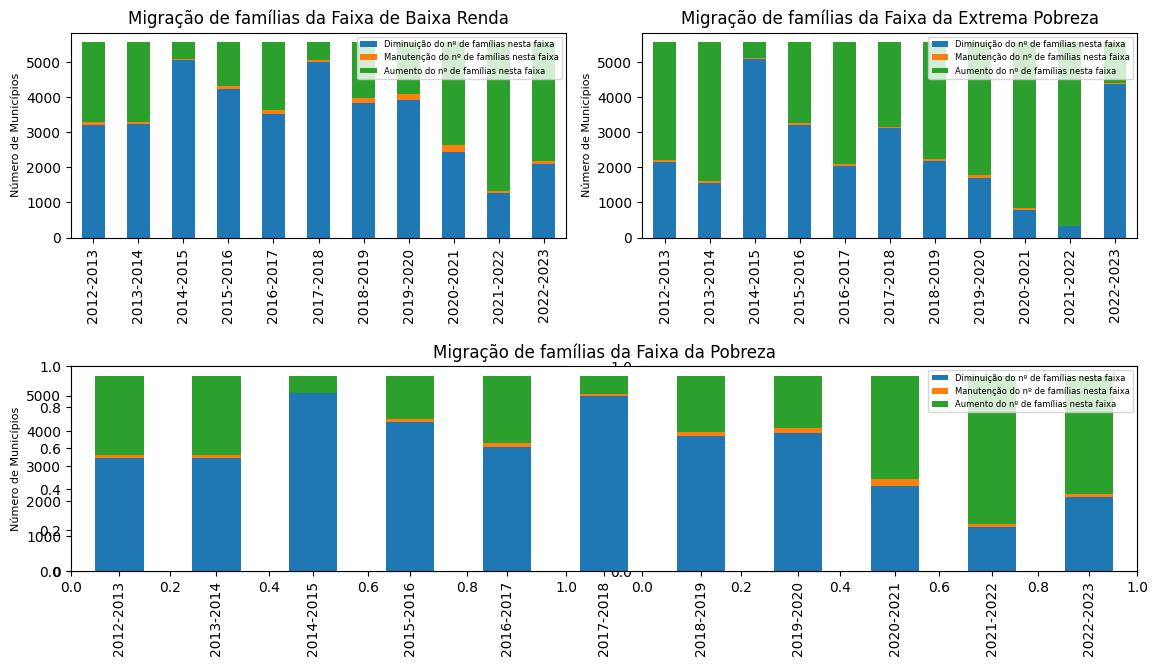

In [110]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

# Ajustar os espaços entre os gráficos
plt.subplots_adjust(wspace=1, hspace=1)  

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Migração de famílias da Faixa de Baixa Renda')
df_cv_baixa_renda.T.plot.bar(stacked=True, ax=ax1)
ax1.set_ylabel('Número de Municípios', fontsize=8)
ax1.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)


ax2 = plt.subplot(2, 2, 2)
ax2.set_title('Migração de famílias da Faixa da Extrema Pobreza')
df_cv_extrema_pobreza.T.plot.bar(stacked=True, ax=ax2)
ax2.set_ylabel('Número de Municípios', fontsize=8)
ax2.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)

ax3 = plt.subplot(2, 1, 2)
ax3.set_title('Migração de famílias da Faixa da Pobreza')
df_cv_pobreza.T.plot.bar(stacked=True, ax=ax3)
ax3.set_ylabel('Número de Municípios', fontsize=8)
ax3.legend((['Diminuição do nº de famílias nesta faixa', 'Manutenção do nº de famílias nesta faixa', 'Aumento do nº de famílias nesta faixa']), fontsize=6)

plt.tight_layout()

plt.show()


### 4c) Preparação para os mapas 

In [175]:
mob_evolucao_pob_e_ext_pob = pd.merge(mob_evolucao_extrema_pobreza, mob_evolucao_pobreza, on = 'ibge_6')

ano = 2012
while ano < 2023: 
    mob_evolucao_pob_e_ext_pob[f'{ano}-{ano+1}'] = mob_evolucao_pob_e_ext_pob[f'{ano}-{ano+1}_x'] + mob_evolucao_pob_e_ext_pob[f'{ano}-{ano+1}_y']
    ano += 1


In [176]:
ano = 2012
while ano < 2023: 
    mob_evolucao_pob_e_ext_pob = mob_evolucao_pob_e_ext_pob.drop(columns = f'{ano}-{ano+1}_x')
    mob_evolucao_pob_e_ext_pob = mob_evolucao_pob_e_ext_pob.drop(columns = f'{ano}-{ano+1}_y')
    ano += 1
    
mob_evolucao_pob_e_ext_pob_sum = mob_evolucao_pob_e_ext_pob
mob_evolucao_pob_e_ext_pob_sum

ano,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,3.0,235.0,-973.0,-265.0,-35.0,-334.0,-99.0,-3.0,10.0,214.0,-298.0
110002,935.0,421.0,-2178.0,-831.0,173.0,-1191.0,-291.0,226.0,433.0,1195.0,-384.0
110003,-114.0,-60.0,-216.0,-48.0,-34.0,-59.0,-21.0,-12.0,36.0,93.0,-68.0
110004,-441.0,-227.0,-835.0,-720.0,-90.0,-376.0,142.0,352.0,480.0,2060.0,-576.0
110005,-21.0,-2.0,-591.0,-72.0,-101.0,-210.0,2.0,0.0,44.0,267.0,-30.0
...,...,...,...,...,...,...,...,...,...,...,...
522200,-186.0,31.0,-222.0,-128.0,-124.0,-179.0,-8.0,75.0,62.0,515.0,75.0
522205,-122.0,16.0,-13.0,-38.0,76.0,93.0,41.0,19.0,-72.0,-28.0,-136.0
522220,34.0,102.0,-34.0,17.0,-39.0,-87.0,-67.0,17.0,63.0,67.0,-128.0


In [177]:
mob_evolucao_pob_e_ext_pob_sum_01 = mob_evolucao_pob_e_ext_pob_sum.map(mapear_valor)
mob_evolucao_pob_e_ext_pob_sum_01

ano,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
ibge_6,,,,,,,,,,,
110001,1,1,-1,-1,-1,-1,-1,-1,1,1,-1
110002,1,1,-1,-1,1,-1,-1,1,1,1,-1
110003,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1
110004,-1,-1,-1,-1,-1,-1,1,1,1,1,-1
110005,-1,-1,-1,-1,-1,-1,1,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
522200,-1,1,-1,-1,-1,-1,-1,1,1,1,1
522205,-1,1,-1,-1,1,1,1,1,-1,-1,-1
522220,1,1,-1,1,-1,-1,-1,1,1,1,-1


# III. Exibição dos mapas

In [185]:
mob_evolucao_pob_e_ext_pob_sum_01['ibge_6'] = mob_evolucao_pob_e_ext_pob_sum_01.index
mob_evolucao_pob_e_ext_pob_sum_01.columns

Index(['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',
       '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022',
       '2022-2023', 'ibge_6'],
      dtype='object', name='ano')

In [186]:
value_vars = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',
       '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022',
       '2022-2023']
mob_evolucao_pob_e_ext_pob_sum_01_mp = mob_evolucao_pob_e_ext_pob_sum_01.melt(id_vars = 'ibge_6', value_vars=value_vars, var_name='ano', value_name='valor')
mob_evolucao_pob_e_ext_pob_sum_01_mp.head()

,ibge_6,ano,valor
0,110001,2012-2013,1
1,110002,2012-2013,1
2,110003,2012-2013,-1
3,110004,2012-2013,-1
4,110005,2012-2013,-1


In [187]:
#criando uma cópia segura dos dados
mob_evolucao_pob_e_ext_pob_sum_01_mp2 = mob_evolucao_pob_e_ext_pob_sum_01_mp.copy()

#criando dataframe com informações de georreferenciamento de municípios
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')

#cruzamento do dataframe resultados com as informações de georreferenciamento
resultados_df = pd.merge(mob_evolucao_pob_e_ext_pob_sum_01_mp2[['ibge_6', 'ano', 'valor']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')


In [189]:
#puxar a malha geográfica do brasil a nível de município
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()

#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

#construir o mapa choroplético com timeline no campo de ano
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(resultados_df,
                    geojson=geojson,
                    scope='south america',
                    color='valor',
                    color_continuous_scale="Reds",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='nome',
                    animation_frame='ano').update_layout(height=800, width=1000, autosize=False)

fig.update_geos(fitbounds="locations", visible=False)

fig.update_traces(marker_line_width=0)

fig.show()